# Restaurant Data Analysis across U.S.A

Lets start by taking a closer look at our dataset of food chains across United States

In [1]:
#!pip install fuzzywuzzy
#!pip install levenshtein

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from fuzzywuzzy import fuzz
import nltk
import random
from matplotlib.colors import Normalize

Lets check the dimension of the data set

In [3]:
null_values=['n/a','--','na','NA','-']
data=pd.read_csv('D:/MS/FastFoodEDA/Datafiniti_Fast_Food_Restaurants_May19.csv',na_values=null_values)
print(data.shape)

(10000, 16)


Lets take a close peek at the top 10 rows of the data

In [4]:
data.head(10)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...
5,AWrSaQ5RZ4Yw-wtdgcZw,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,1350 W Colfax Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Denver,US,us/co/denver/1350wcolfaxavenue/-1161002137,39.739670,-105.004670,McDonald's,80204,CO,https://www.yellowpages.com/denver-co/mip/mcdo...,https://www.mcdonalds.com/us/en-us/location/CO...
6,AWrSaQ4EsVYjT2BJAy_I,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,200 16th Street,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Denver,US,us/co/denver/20016thstreet/-1161002137,39.741700,-104.988290,McDonald's,80202,CO,https://www.yellowpages.com/denver-co/mip/mcdo...,https://www.mcdonalds.com/us/en-us/location/CO...
7,AWCvDUHSIxWefVJwvq4y,2018-01-01T00:01:02Z,2019-05-19T22:58:35Z,1772 N College Ave,"Restaurant,Carry-out food,Mexican Restaurants,...",Accommodation & Food Services,Fayetteville,US,us/ar/fayetteville/1772ncollegeave/-864103396,36.085369,-94.155319,Taco Bell,72703,AR,http://www.insiderpages.com/b/3709775090/taco-...,"http://www.tacobell.com/,http://www.tacobell.com"
8,AWrSTT3sQTFama1Xpjyq,2019-05-19T22:53:58Z,2019-05-19T22:53:58Z,605 S Havana Street,"Fast Food Restaurants,American Restaurants,Fam...",Accommodation & Food Services,Aurora,US,us/co/aurora/605shavanastreet/1077717834,39.705340,-104.866330,Captain D's Seafood Kitchen,80012,CO,https://www.yellowpages.com/denver-co/mip/capt...,http://www.captainds.com
9,AWkq412CIxWefVJwH_cO,2019-02-26T17:18:51Z,2019-05-19T22:51:18Z,16th Glenarm Place,"Mexican Restaurants,Caterers,Greek Restaurants...",Accommodation & Food Services,Denver,US,us/co/denver/16thglenarmplace/2067027233,39.749107,-104.994590,Shondiz,80202,CO,https://www.yellowpages.com/denver-co/mip/shon...,"http://www.shondiz.com,http://www.shondiz.com/"


We can remove few of the columns that we don't need for any purpose

In [5]:
df=data.drop(['id','keys','sourceURLs','websites'],axis=1)
df

,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,latitude,longitude,name,postalCode,province
0,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,40.396290,-104.696990,Carl's Jr.,80631,CO
1,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,39.081350,-108.586890,Del Taco,81505,CO
2,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,39.091480,-108.554110,Which Wich,81506,CO
3,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO
4,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,39.740440,-104.926360,Taco Bell,80220,CO
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2016-05-31T13:33:45Z,2018-12-03T09:04:19Z,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",Accommodation & Food Services,Bessemer,US,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL
9996,2017-07-18T20:19:50Z,2018-12-02T00:08:36Z,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Accommodation & Food Services,Raleigh,US,35.884500,-78.737541,Luxury Box,27613-6996,NC
9997,2017-09-05T23:05:50Z,2018-12-01T07:38:03Z,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",Accommodation & Food Services,Plover,US,44.453180,-89.543170,McDonald's,54467,WI
9998,2016-03-31T02:43:12Z,2018-12-01T07:35:22Z,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Hendersonville,US,36.308262,-86.607339,Pizza Hut,37075,TN


Lets check for null or missimg values now

In [6]:
print (df.isnull().sum())

dateAdded            0
dateUpdated          0
address              0
categories           0
primaryCategories    0
city                 0
country              0
latitude             0
longitude            0
name                 0
postalCode           0
province             0
dtype: int64


We can also create a simple function to keep track of any exceptional missing values

In [7]:

col_names=list(df)
i=0
for row in df[col_names[i]]:
    try:
        int(row)
        df.loc[i,col_names[i]]=np.nan
    except ValueError:
        pass
    i=i+1
print('Exceptional Missing data count:\n',df.isnull().sum())

Exceptional Missing data count:
 dateAdded            0
dateUpdated          0
address              0
categories           0
primaryCategories    0
city                 0
country              0
latitude             0
longitude            0
name                 0
postalCode           0
province             0
dtype: int64


In [8]:
# As we can see there are no missing values present in the dataset, but if there were, we can impute the data by using the median of that feature
# median = df[col_name].median()
# df[col_name].fillna(median, inplace=True)

In [9]:
# Lets now perform an analysis of all the restaurants and their popularity across US
#df['name'].plot(kind='bar')

# Analysis of restaurants for each city

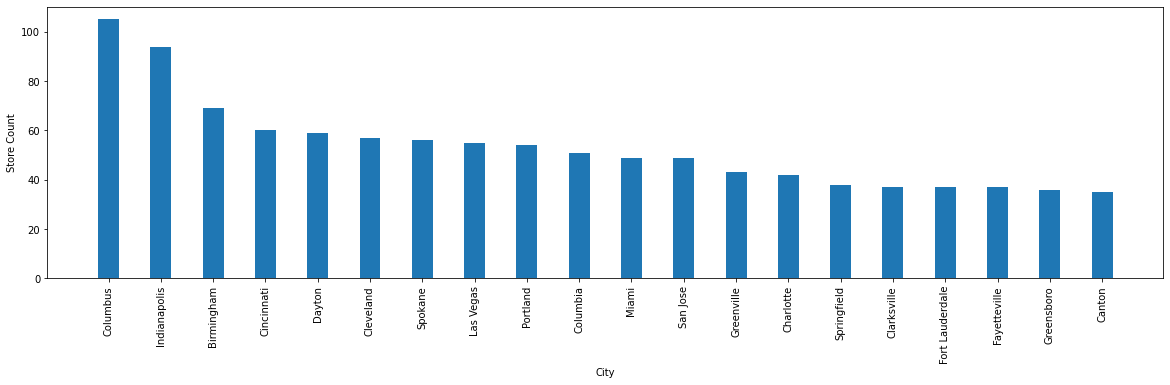

In [21]:
res_data=pd.DataFrame(df.groupby('city')['name'].count().reset_index()).sort_values(by='name',ascending=False)
res_data
fig=plt.figure(figsize=(20,5))
plt.bar(res_data['city'][:20],res_data['name'][:20],width=0.4)
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Store Count')
plt.show()

As we can see Columbus has the highest restaurant count as per 2019

# Analysis of restaurant popularity across provinces

In [11]:
res_pop=pd.DataFrame(df.groupby('name')['city'].count().reset_index()).sort_values(by='city',ascending=False).rename(columns={'city':'store_count'})
res_pop

,name,store_count
924,McDonald's,765
1315,Subway,667
1209,SUBWAY,543
1352,Taco Bell,529
1100,Pizza Hut,474
...,...,...
583,George's Gyros Spot,1
582,George's Coney's Gyro's,1
581,George's Burgers,1
580,Gentile's Bakery - Deli - Catering,1


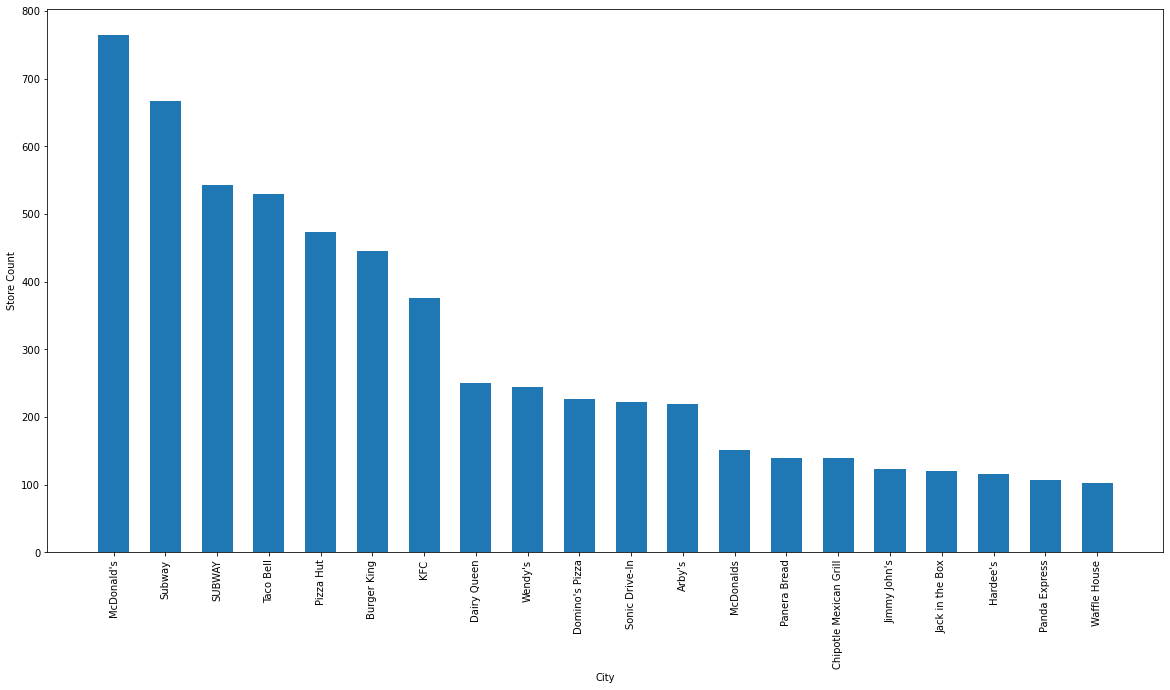

In [37]:
fig=plt.figure(figsize=(20,10))
plt.bar(res_pop['name'][:20],res_pop['store_count'][:20],width=0.6)
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Store Count')
plt.show()



We can see that there are restaurant names that are present in more than one way, for example 'McDonald's' and 'McDonalds'. So we need to fix that.

# Fixing similar restaurant names for better analysis

In [13]:
match_ratio={}
for i in range(len(df['name'].unique())):
    str1=df['name'][i]
    matched_lst=[] 
    for j in range(len(df['name'].unique())):        
        str2=df['name'][j]
        ratio=fuzz.token_sort_ratio(str1,str2)        
        if ratio>=85:            
            matched_lst.append(str2)
            match_ratio[str1]=matched_lst
           
    

In [14]:
sorted(match_ratio.items())


[('900 Degrees Pizza', ['900 Degrees Pizza']),
 ('AW All-American Food',
  ['AW All-American Food',
   'AW All-American Food',
   'AW All-American Food',
   'AW All-American Food',
   'AW All-American Food']),
 ('Adams Enterprises', ['Adams Enterprises']),
 ('Ak Buffet', ['Ak Buffet']),
 ("Alfonso's Pizza Italian Restaurant",
  ["Alfonso's Pizza Italian Restaurant"]),
 ("Andy's Frozen Custard", ["Andy's Frozen Custard"]),
 ('Apollo Burgers', ['Apollo Burgers']),
 ("Arby's",
  ["Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's",
   "Arby's"]),
 ("Arby's - Closed", ["Arby's - Closed"]),
 ('Arctic Circle', ['Arctic Circle']),
 ("Auntie Anne's Soft Pretzels", ["Auntie Anne's Soft Pretzels"]),
 ('BLIMPIE',
  ['BL

Now we will use this dataset to replace the original restaurant names

In [15]:
replaced={}
for row in match_ratio.items():
    for similar in row[1]:
        replaced[similar]=row[0]

names = df['name'].values
for i in range(len(names)):
    if replaced.get(names[i]) != None:
        names[i] = replaced[names[i]]

df['name'] = names
        

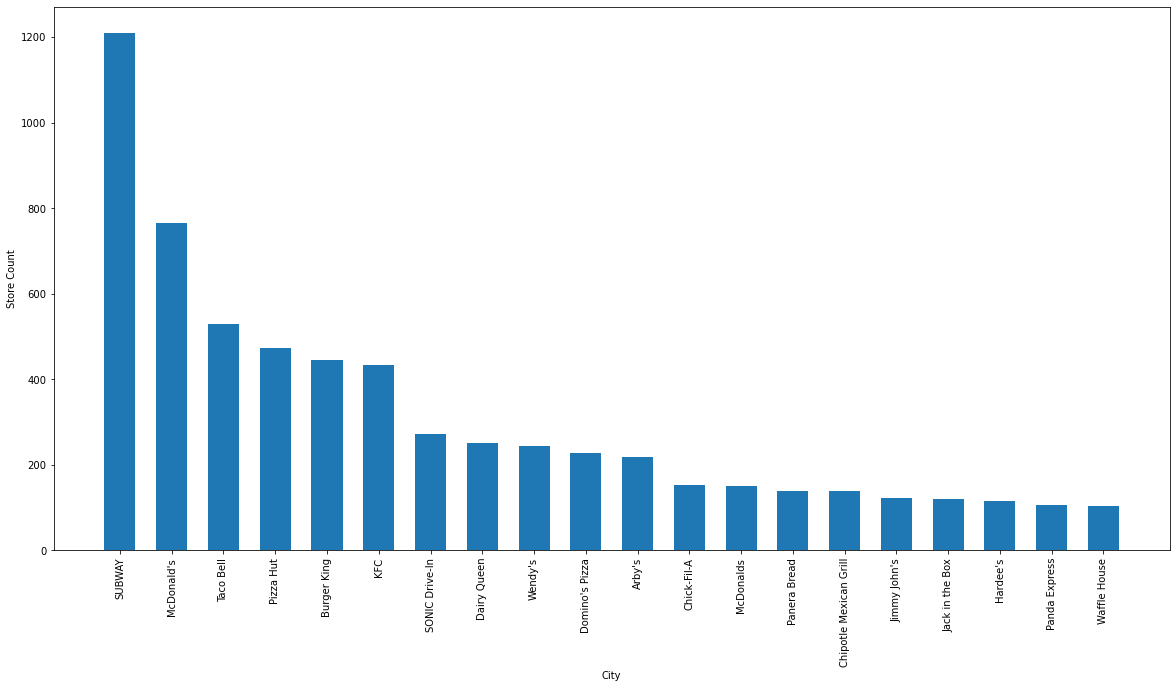

In [16]:
new_res=pd.DataFrame(df.groupby('name')['city'].count().reset_index()).sort_values(by='city',ascending=False).rename(columns={'city':'store_count'})
new_res
fig=plt.figure(figsize=(20,10))
plt.bar(new_res['name'][:20],new_res['store_count'][:20],width=0.6)
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Store Count')
plt.show()

Now we can see that SUBWAY has surpassed McDonald's after replacing the similar names

# Analysis of Categories Of Restaurants

In [17]:
sub_df=[df['categories'],df['city']]
headers=['categories','city']
sub_df=pd.concat(sub_df,axis=1,keys=headers)
sub_df
cat_lst=[]
city_lst=[]
for rows in sub_df.itertuples():
    #print(rows)
    temp_cat=rows[1].split(',')
    for c in temp_cat:
        cat_lst.append(c)
        city_lst.append(rows[2])
    
cat_df=pd.DataFrame(list(map(list, zip(cat_lst,city_lst))))   
new_cat_df=cat_df.rename(columns={0:'categories',1:'city'})

new_cat_df=new_cat_df.replace(to_replace=["Restaurants","Restaurant","Fast Food Restaurant","Fast Food"],value="Fast Food Restaurants")

Now that our dataframe is ready we will draw our charts

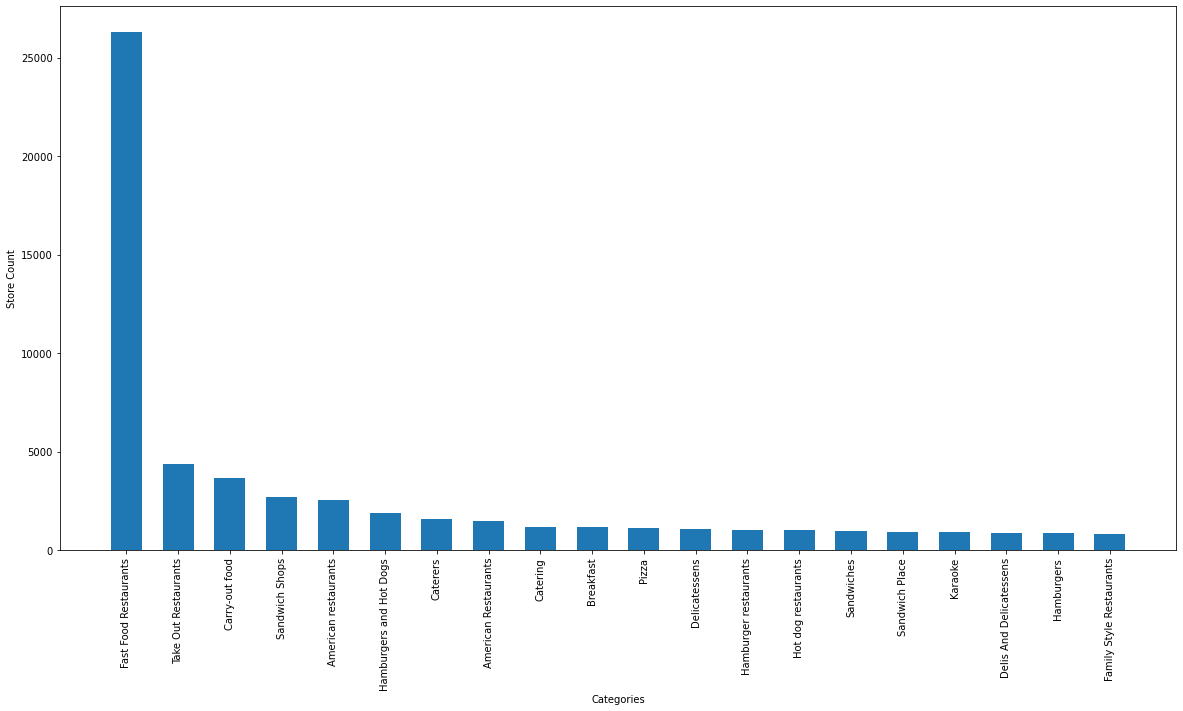

In [18]:
new_res=pd.DataFrame(new_cat_df.groupby('categories')['city'].count().reset_index()).sort_values(by='city',ascending=False).rename(columns={'city':'store_count'})
new_res
fig=plt.figure(figsize=(20,10))
plt.bar(new_res['categories'][:20],new_res['store_count'][:20],width=0.6)
plt.xticks(rotation='vertical')
plt.xlabel('Categories')
plt.ylabel('Store Count')
plt.show()

We can see that "Fast Food Restaurants" are the most popular across USA


# Analysis of Categories across Cities

<AxesSubplot:xlabel='City'>

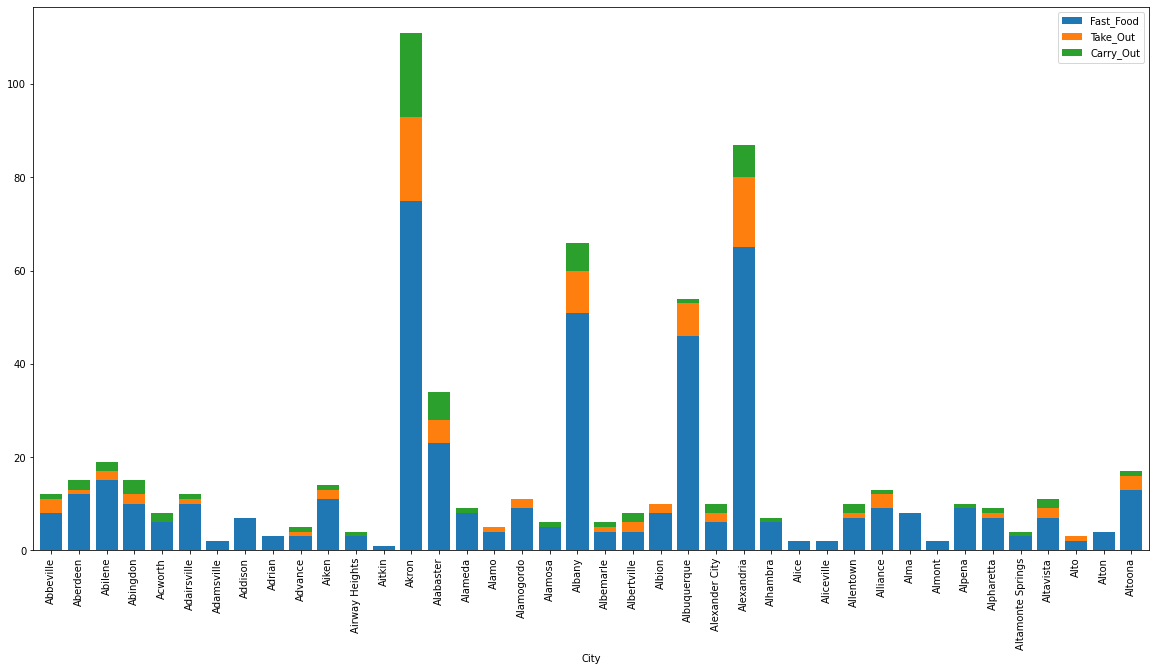

In [90]:
df_plot = new_cat_df.groupby(['city', 'categories']).size().reset_index().pivot(columns='categories', index='city', values=0)
cat_ly=pd.DataFrame()
cat_ly['Fast_Food']=df_plot['Fast Food Restaurants'][:40]
cat_ly['Take_Out']=df_plot['Take Out Restaurants'][:40]
cat_ly['Carry_Out']=df_plot['Carry-out food'][:40]
cat_ly['City']=np.array(df_plot.index[:40])
cat_ly.reset_index(drop=True,inplace=True)
cat_ly.fillna(0,inplace=True)
cat_ly.plot(x='City',kind='bar', stacked=True,figsize=(20,10),width=0.8)